In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, decomposition

In [9]:
iris= datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [10]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
pca = decomposition.PCA(n_components=2).fit(X)
x_dr = pca.transform(X)
x_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
x_dr[y==0, 0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

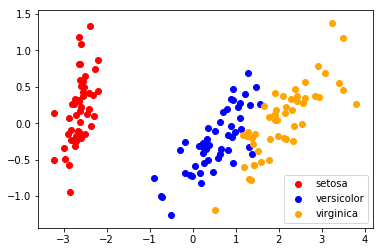

In [15]:
colors = ['red', 'blue', 'orange']
names = iris.target_names
# plt.figure()
# plt.scatter(x_dr[y==0, 0], x_dr[y==0, 1], c='red', label=iris.target_names[0])
# plt.scatter(x_dr[y==1, 0], x_dr[y==1, 1], c='b', label=iris.target_names[1])
# plt.scatter(x_dr[y==2, 0], x_dr[y==2, 1], c='orange', label=iris.target_names[2])
# plt.legend()
# plt.show()

plt.figure()
for i in range(0, 3):
    plt.scatter(x_dr[y==i, 0], x_dr[y==i, 1], c=colors[i], label=names[i])
plt.legend()
plt.show()

In [16]:
# pca.explained_variance_ 查看将为后
pca.explained_variance_

array([4.22824171, 0.24267075])

In [17]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [18]:
pca.explained_variance_ratio_.sum()

0.977685206318795

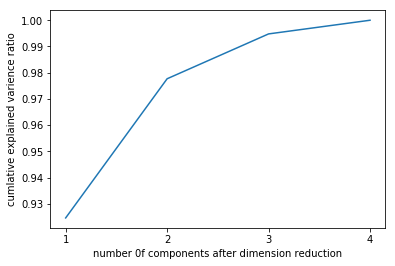

In [20]:
# 选择最好的n_components: 累积可解释方差贡献率曲线
# 累积可解释贡献率曲线是一条降维后保留特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献率为
# 为纵坐标的曲线，能帮助我们决定n_components最好的取值
# n_components 不填写任何值，则默认返回min(X.shape)
pca_line = decomposition.PCA().fit(X)
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])
plt.xlabel('number 0f components after dimension reduction')
plt.ylabel('cumlative explained varience ratio')
plt.show()

In [21]:
# 最大似然估计自选超参数
pca_mle = decomposition.PCA(n_components='mle').fit(X)
x_mle = pca_mle.transform(X)
x_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [22]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [23]:
# 按照信息量占比选超参数
pca_f = decomposition.PCA(n_components=0.97, svd_solver='full')
x_f = pca_f.fit_transform(X)
x_f

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [24]:
pca_f.explained_variance_

array([4.22824171, 0.24267075])

In [25]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [26]:
pca.explained_variance_ratio_.sum()

0.977685206318795